# An introduction to Jupyter notebooks

A Jupyter notebook (formally iPython) is an interactive environment for Python, and it's probably the best way of using Python for data manipulation.  You may ask: "I can just run python interactively from the terminal, why do I need jupyter?"  Well, that's a fair question, and the answer will hopefully become clear as we work through this notebook.

Jupyter notebooks are broken down into **cells**.  We're in the topmost cell of this notbook at the moment.  Cells come in three flavors:

* **Markdown cells** allows you to edit the text in Markdown.  These cells are used for exposition, discussion, and general formatting.  Think of them as extended comments that can be formatted beautifully, and can contain [links](http://www.jupyter.org), bulleted lists, etc.  Anything that Markdown can!  It even allows for LaTeX:
$$\int_{1}^{\sqrt[3]{3}} cos_i(4x-1)$$
* **Code cells** contain code (for us, Python code).  These cells can contain code as short as one line, or as long as you'd like!  (Actually, I have no idea what the maximum length is.  I've had cells well over 100 lines long though).  They have some basic text editor support, so they'll help you with indentation, tab completion, etc., but they won't be able to do some of the magic that true editors like Atom or Sublime can handle.  They're also interactive in the same way that the Python interpretter in interactive mode is.  Type `15*4 %3` and it returns the answer, no need to `print` out everything.

There's one more, but it's not used as often:

* **Raw cells** are used when you want to hack the notebook to make it fancier.  We won't be using them tons, but it's good to know they exist.

**Note**: If you're running into any unexpected errors while working through this notebook, contact Dr Z.

How about a little demonstation?  Run the code cell below with `shift + enter`

In [ ]:
def is_prime(n):
    """ Determine whether n is prime."""
    k = 2
    while k*k <= n:
        if n % k == 0:
            return False
        k += 1
    return True

x = [x for x in range(2,401) if is_prime(x)]

print(*x)

In [2]:
# As proof that the function is in memory, let's query the function
print(is_prime, type(is_prime), is_prime(57), sep="\n"*2)

<function is_prime at 0x000002A61D7A0D08>

<class 'function'>

False


## Editting a notebook: Command mode and Edit mode

While working with a notebook, you are always in one of two modes.

1. In **Edit mode** you can edit the content of a cell.  You're in edit mode in a cell when the left border of the cell is green.  It acts like a text file inside a text editor, and has some helpful syntax highlighting.  If you're editing a Markdown cell, it will look significantly different.  If you're editing a code cell, it will look mostly the same.  To *run* the cell, you have a few options:
 * press `command + enter` or `ctrl + enter` to run the cell and exit edit mode.  Running a markdown cell with render it, and running a code cell performs as you expect.
 * press `shift + enter` to run the cell and insert a new cell below.  This is the standard command when you're building the notebook.
1. In **Command mode** you have access to your cells in a larger-scale way.  You're in command mode on a cell when the left border of the cell is blue.  You can press `up` or `down` to move between cells, and press `enter` to enter edit mode on the currently selected cells.  You can also cut, copy, paste, and delete cells with appropriate keyboard commands.  Open the *Command Palette* (the keyboard in the top center of the toolbar) to see all the commands you can use in Command mode.

## Linearity of code: the kernel

A notebook has a **kernel** attached to it.  Think of it as the interactive python interpreter running behind the scenes, executing your commands when you send them.  There are two forms of "linearity" (or temporal/time state) going on here, and it can be a bit confusing to new Jupyter users:

* **Kernel Linearity**: After you execute a code cell, it gives you its output and places a number next to the top of the cell.  This number is the *order of cell execution* in the kernel.  It's the order the kernel is receiving.  This means you can run cells, tweak them and run them again, run something "below" the cell in the notebook, then come back and run the upper cell, *etc.*, and the kernel will keep track of this in terms of the order in which you ran them **chronologically**.  This is the order you want to keep in mind.  It's really useful!  You can start out with a junky-looking notebook, figure out your data analysis, realize you want to change stuff "in the past", and just go back and change them.  Once you get used to this, you'll love it.
* **Cell Linearity**: There is an obvious order to the cells: the top ones "go first", and the lower ones "go next".  This isn't exactly necessary, though.  It definitely is the goal of the *final product* to go linearly, but programming, and especially data analysis, isn't like reading an essay.  Very often, you'll need to go back and change things, then rerun all the cells that come after the one you just edited.  You may type one line in a cell, hit `shift + enter` to see the output and move on to the next cell, then do that three more times.  You then realize that you'd prefer to have done all that at once, and you can merge those three cells together.  It's a workflow that I hope you'll learn to love.

Play around with it now: use an uninitialized variable `my_hat` in a cell, then hit `esc` to leave the cell without running (or hit `shift + enter` to see the error.  Below that, create a cell in which you give the variable a value, then run that cell, followed by the original cell: 

In [5]:
# Press `shift+enter` to see an error

print(my_hat)

Oh, now it works!


In [4]:
# run this cell, then run the above cell!

my_hat = "Oh, now it works!"

You'll get the hang of it in time.  One other thing to note about jupyter notebooks is that, unlike the python interpretter, you have easy access to your shell (bash or cmd, most likely) by using the `!` operator:

In [6]:
!echo "Hello from a text file!" > hello.txt

In [10]:
## Let's see the file we just made:

# I'm on a windows machine as I create this, so I'll use: 
!dir 

# But if you're on a *nix machine (like a macbook) you should use: 
# !ls

 Volume in drive C is Windows
 Volume Serial Number is BC96-4BCD

 Directory of C:\Users\nicho\Dropbox\courses\current\csc630_machine_learning\jupyter\lessons

09/20/2018  12:29 PM    <DIR>          .
09/20/2018  12:29 PM    <DIR>          ..
09/20/2018  09:02 AM    <DIR>          .ipynb_checkpoints
09/20/2018  10:21 AM           132,889 Basics of Supervised Learning.ipynb
09/20/2018  10:22 AM            94,930 Datasets and Data Types.ipynb
09/20/2018  10:22 AM           122,338 data_types_autos.png
09/20/2018  10:22 AM           109,773 Distributions.ipynb
09/20/2018  12:28 PM            24,748 Intro_to_jupyter.ipynb
               5 File(s)        484,678 bytes
               3 Dir(s)  17,449,644,032 bytes free


In [8]:
# Python command to open the text file we just made:
with open("hello.txt") as f:
    print(f.read())

"Hello from a text file!" 



In [9]:
# Again, the windows commands: 
!del hello.txt

# But if you're on a *nix machine you should use: 
# !rm hello.txt

Because you can access the terminal from jupyter, you can use it to access [pip](https://docs.python.org/3/installing/index.html) to install libraries!

In [12]:
!pip list

bash-kernel (0.4.1)
beautifulsoup4 (4.5.1)
bleach (1.5.0)
bs4 (0.0.1)
colorama (0.3.9)
cycler (0.10.0)
decorator (4.1.2)
entrypoints (0.2.3)
html5lib (0.9999999)
ipykernel (4.6.1)
ipython (6.1.0)
ipython-genutils (0.2.0)
ipywidgets (6.0.0)
isodate (0.5.4)
jedi (0.10.2)
Jinja2 (2.9.6)
jsonschema (2.6.0)
jupyter (1.0.0)
jupyter-client (5.1.0)
jupyter-console (5.2.0)
jupyter-core (4.3.0)
lxml (3.7.3)
MarkupSafe (1.0)
matplotlib (2.0.2)
mediacloud (2.44.0)
mistune (0.7.4)
nbconvert (5.2.1)
nbformat (4.4.0)
nltk (3.2.1)
nose (1.3.7)
notebook (5.0.0)
numpy (1.13.1)
oauthlib (2.0.0)
pandas (0.20.3)
pandocfilters (1.4.2)
path.py (10.3.1)
patsy (0.4.1)
pexpect (4.2.0)
pickleshare (0.7.4)
Pillow (3.4.2)
pip (9.0.1)
prompt-toolkit (1.0.15)
protobuf (3.2.0)
ptyprocess (0.5.1)
pydot (1.2.3)
pydot-ng (1.0.0)
Pygments (2.2.0)
pyparsing (2.2.0)
PyPDF2 (1.26.0)
pyperclip (1.5.27)
pyreadline (2.1)
python-dateutil (2.6.1)
pytz (2017.2)
pyzmq (16.0.2)
qtconsole (4.3.1)
rdflib (4.2.1)
requests (2.11.1)
req

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Notice that this makes a somewhat long printout.  In your final submission of a notebook, you should remove all the long printouts to have a more readable notebook.  Now let's move on to something more interesting.

# Visualizing some standard datasets

Jupyter notebooks are a great way to work with data.  To describe this, let's load a famous dataset and work with it.

In [13]:
# standard import statements.  We'll understand these soon enough!
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Jupyter "magics": lines beginning with a `%` are how you talk to Jupyter.  Here, I'm telling 
#   Jupyter to display matplotlib plots as inline, as opposed to the default of having them pop
#   up in their own window, buried behind everything else.
# Another option is `matplotlib notebook`, which gives the plot a few more features, 
#   but those features are usually not that necessary unless you're needing to manipulate the 
#   graphic, like in a 3d plot, or save the individual plot to a .png file.
%matplotlib inline

# This just makes my plots look nice; it's completely optional
plt.style.use("fivethirtyeight") 

# Now, load the data from scikit-learn, a machine learning library
iris = datasets.load_iris()

# What's in iris?
iris.keys()

dict_keys(['target_names', 'feature_names', 'DESCR', 'target', 'data'])

In [14]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [15]:
X = iris.data

# What is X?
type(X)

numpy.ndarray

[NumPy](https://docs.scipy.org/doc/numpy/user/quickstart.html) is a linear algebra library written in C & Python.  Basically, you write Python code, but you get the power of C under the hood.  It's the library that all of the PyData stack, all these Python data science libraries, were built off of.  Our dataset `X` is a NumPy array, which is the basic data type in NumPy.

In [16]:
# Show four rows
X[:4,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2]])

One staple Python library for working with data is [Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html), which provides a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) object, which is essentially a NumPy array with lots of extra methods attached to it.

In [17]:
df = pd.DataFrame(X, columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df.shape ## a dataset is always arranged as rows = samples, columns = variables

(150, 4)

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Our dataset is 4-dimensional, so it will be a little bit tricky to visualize.  First, though, we need to add in the _response_ variable, the species of the iris being investigated.

In [21]:
df['species'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We'll visualize it by plotting many different 2-dimensional slices:

In [22]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

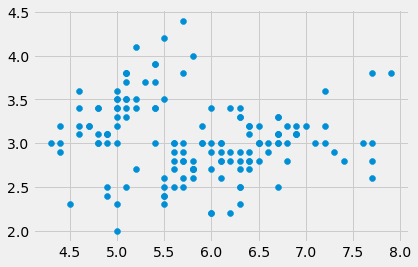

In [23]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

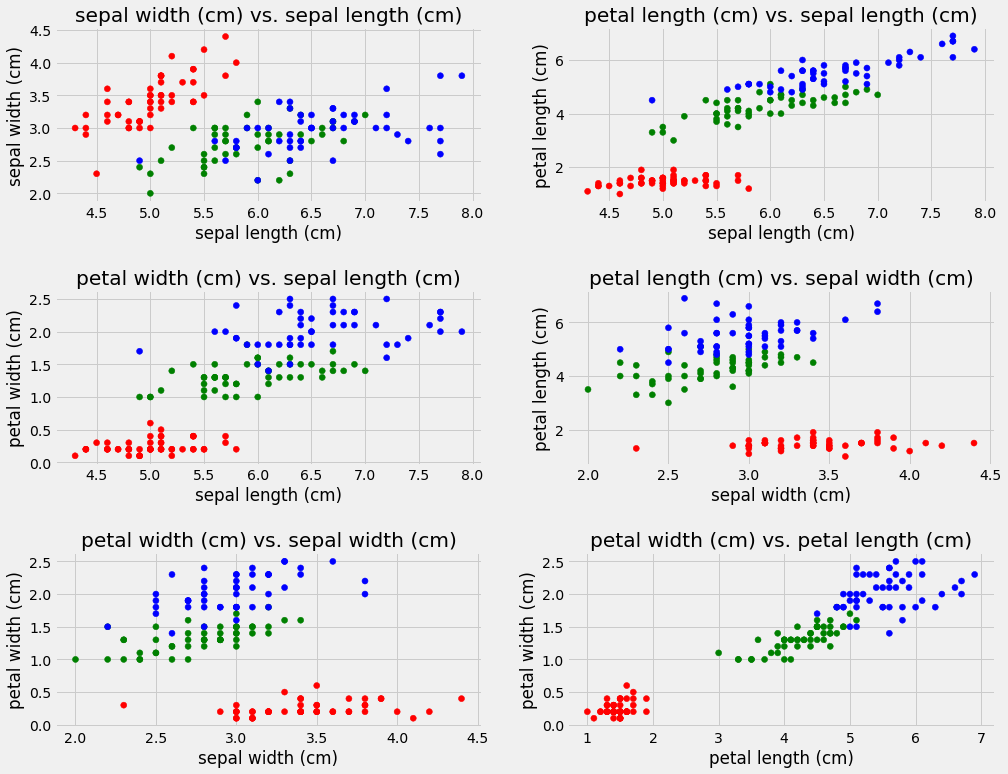

In [24]:
# Create a list of colors from the elements of the Species column
colors = {species: color for species, color in zip(df.species.unique(),['r','g','b'])}
color_column = df.species.map(colors)

# Create a figure object
fig = plt.figure(figsize=(15,12))
fig.subplots_adjust(hspace=.5) # This line adds some space between plots

# Make all the subplots
for i,(x,y) in enumerate(combinations([x for x in df.columns if x != "species"],2)):
    # x and y are pairs of features.  Scatterplot them!
    ax = fig.add_subplot(3,2,i + 1)
    ax.scatter(df[x], df[y], c=color_column)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.title("{} vs. {}".format(y,x));  # The semi-colon is just to make the printout ever-so-slightly nicer

That was a lot.  Let's look at the minimal amount of matplotlib code to generate one of those scatter plots:

In [30]:
print(*zip(df.species.unique(),['r','g','b', 'food']))

(0, 'r') (1, 'g') (2, 'b')


In [33]:
color_column

0      r
1      r
2      r
3      r
4      r
5      r
6      r
7      r
8      r
9      r
10     r
11     r
12     r
13     r
14     r
15     r
16     r
17     r
18     r
19     r
20     r
21     r
22     r
23     r
24     r
25     r
26     r
27     r
28     r
29     r
      ..
120    b
121    b
122    b
123    b
124    b
125    b
126    b
127    b
128    b
129    b
130    b
131    b
132    b
133    b
134    b
135    b
136    b
137    b
138    b
139    b
140    b
141    b
142    b
143    b
144    b
145    b
146    b
147    b
148    b
149    b
Name: species, Length: 150, dtype: object

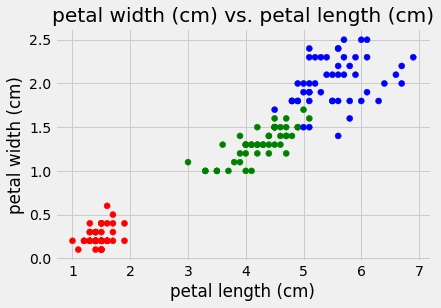

In [34]:
# Create a list of colors from the elements of the Species column
colors = {species: color for species, color in zip(df.species.unique(),['r','g','b'])}
color_column = df.species.map(colors)

x = "petal length (cm)"
y = "petal width (cm)"
plt.scatter(df[x], df[y], c=color_column)
plt.xlabel(x)
plt.ylabel(y)
plt.title("{} vs. {}".format(y,x));

Or, alternatively, you can use Pandas' built-in matplotlib methods:

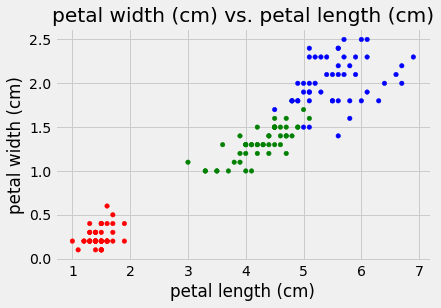

In [35]:
df.plot(x, y, kind = "scatter", c=color_column)
plt.title("{} vs. {}".format(y,x));

(Note that it's the same plot! That's not a coincidence, pandas just wrote the basic plot code for you.) What about that plot of all the pairs of features?  The library Seaborn contains some helpful plots that can save you a great deal of code.

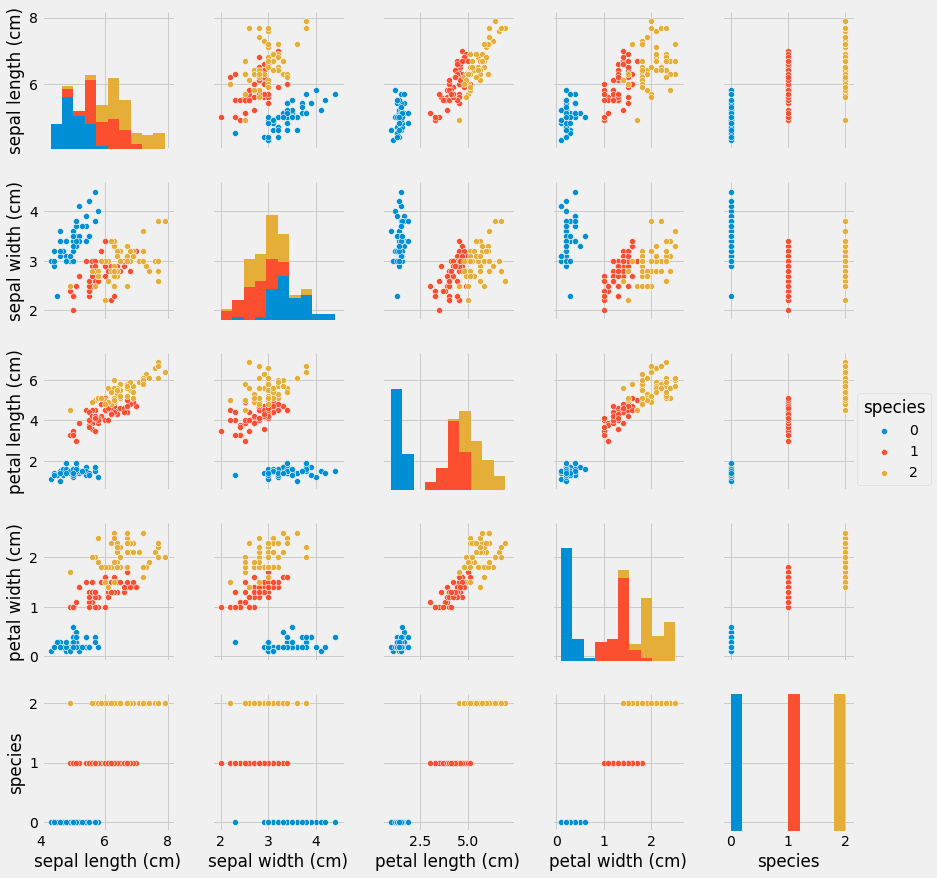

In [36]:
sns.pairplot(df, hue='species');

In [42]:
setosas = df[df['species'] == 0]

There are a few in there on the diagonal, so those are `x` against `x` for each feature `x`.  Those are _histograms_, and they help you to digest a column of data.

(array([ 86.,  64.,   0.]),
 array([ 0. ,  1.5,  3. ,  7. ]),
 <a list of 3 Patch objects>)

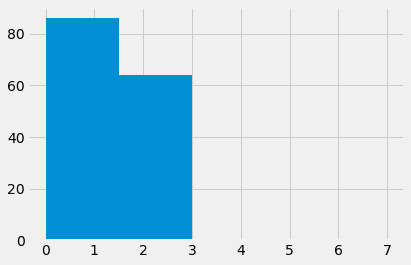

In [52]:
plt.hist(df[pred], bins=[0,1.5,3,7])

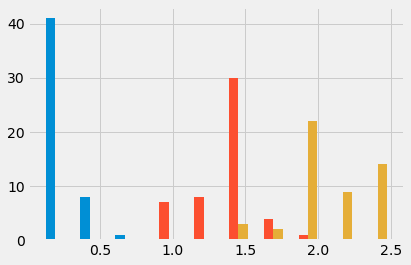

In [48]:
# If we wanted to create Seaborn's color splitting, we'll need to split the data up by class.  
# Note the boolean slicing!

labels = [0,1,2]
pred = "petal width (cm)"

plt.hist([df[df.species == labels[0]][pred], 
          df[df.species == labels[1]][pred],
          df[df.species == labels[2]][pred]], 
          stacked=False);

### Subplots in Matplotlib 

To show one more bit about matplotlib, our main plotting library, we'll use another famous dataset: [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet). (By the way, double-click on this cell to edit the markdown, and view how links work.  You should definitely use links to format things!)

In [53]:
## Anscombe's Quartet

ansc = pd.DataFrame({'x1':[10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
                     'y1':[8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
                     'x2':[10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
                     'y2':[9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74],
                     'x3':[10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
                     'y3':[7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73],
                     'x4':[8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0],
                     'y4':[6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]})

ansc.head()

,x1,x2,x3,x4,y1,y2,y3,y4
0,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
1,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
2,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
3,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
4,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47


Let's begin by checking out the data.

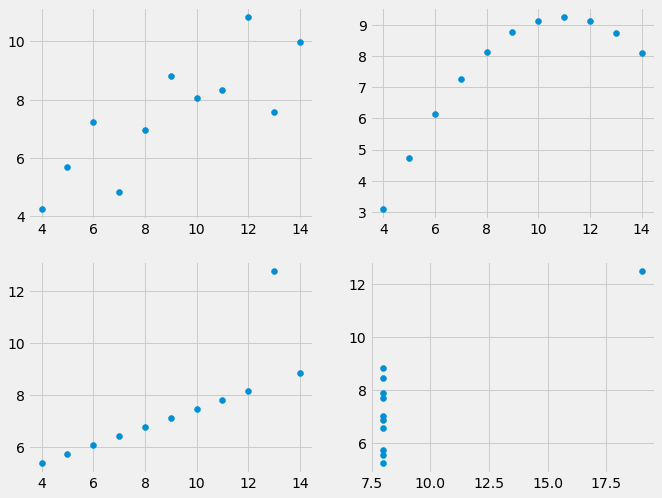

In [54]:
figure = plt.figure(figsize=(10,8))
axs = [figure.add_subplot(2,2,i) for i in range(1,5)]

for i in range(1,5):
    axs[i-1].scatter(ansc['x'+str(i)], ansc['y'+str(i)]);

The incredible thing about Anscombe's quartet is that it's four different datasets, all with the same means, variances, correlation, and linear regression line.  Let's check these facts!

In [55]:
print("Means of the x's:","","", *[ansc['x{}'.format(i+1)].mean() for i in range(4)], sep='\t')
print("Variances of the x's:","","", *[ansc['x{}'.format(i+1)].var() for i in range(4)], sep='\t')
print("Means of the y's:","","", *[ansc['y{}'.format(i+1)].mean().round(3) for i in range(4)], sep='\t')
print("Variances of the y's:","","", *[ansc['y{}'.format(i+1)].var().round(3) for i in range(4)], sep='\t')
print("Correlations between the x's and y's:",
      *[ansc[['x{}'.format(i+1),'y{}'.format(i+1)]].corr().values[0,1].round(3) for i in range(4)], sep='\t')

Means of the x's:			9.0	9.0	9.0	9.0
Variances of the x's:			11.0	11.0	11.0	11.0
Means of the y's:			7.501	7.501	7.5	7.501
Variances of the y's:			4.127	4.128	4.123	4.123
Correlations between the x's and y's:	0.816	0.816	0.816	0.817


That looks a bit messy.  What's going on here is I'm using what's called a [list comprehension](https://docs.python.org/3.6/tutorial/datastructures.html#list-comprehensions), whose basic syntax is:

```
[<expression> for <item> in <iterable> if <condition>]
```

and the condition is optional.  For example, from the first code cell up top:

In [ ]:
[str(x) + " is prime!"  for x in range(2,30) if is_prime(x)]

This populates a list with `x`s (the expression could be any function of `x`) for each `x` in the given range, provided that `x` is prime.

The last thing to note is the splat operator, AKA putting a star before a list.  That unpacks a list, and it's best explained by example:

In [ ]:
print("Without splat:", [1,2,3,4,5], sep="_SEP_")
print("With splat:", *[1,2,3,4,5], sep="_SEP_")

Okay, so we've seen that the data sets have everything in common, except for the fact that their linear regression lines are the same.  To finish, let's compute those and add them to our plots.  Here, we're using [Scikit-Learn](http://scikit-learn.org/stable/), the machine learning library for Python.

In [56]:
models = []

for i in range(4):
    # Create the regression model object
    model = LinearRegression()
    
    # Fit the model to our data.  Note that when you have a one dimensional input, you need to reshape
    model.fit(ansc['x'+str(i+1)].values.reshape(-1,1), ansc['y'+str(i+1)])
    
    models.append(model)
    
print("Slopes of the regression lines:", "", *[round(models[i].coef_[0], 3) for i in range(4)], sep='\t')
print("Intercepts of the regression lines:", *[round(models[i].intercept_) for i in range(4)], sep='\t')

Slopes of the regression lines:		0.5	0.5	0.5	0.5
Intercepts of the regression lines:	3.0	3.0	3.0	3.0


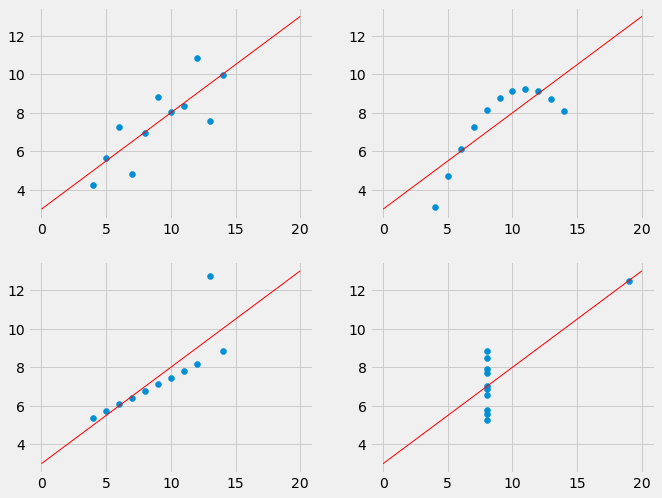

In [57]:
figure = plt.figure(figsize=(10,8))
axs = [figure.add_subplot(2,2,i) for i in range(1,5)]

for i in range(1,5):
    axs[i-1].scatter(ansc['x'+str(i)].values.reshape(-1,1), ansc['y'+str(i)])
    m, b = (models[i-1].coef_[0],models[i-1].intercept_)
    axs[i-1].plot([0, 20], [b, m * 20 + b], 'r-', linewidth=1)

What a curious dataset!  It was hand-made to demonstrate the importance of data visualization.